In [3]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import pmdarima as pm

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.datasets import co2, get_rdataset

from plotnine import *

from statsmodels.tsa.seasonal import seasonal_decompose, STL

from statsmodels.tsa.filters.hp_filter import hpfilter

from statsmodels.tsa.stattools import adfuller, kpss

import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

from statsmodels.tsa.api import AutoReg

from statsmodels.stats.api import (het_breuschpagan, het_goldfeldquandt, het_white)

from scipy.stats import boxcox

from statsmodels.stats.diagnostic import acorr_ljungbox

from pmdarima.arima.utils import ndiffs, nsdiffs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.api import (kpss, adfuller, seasonal_decompose, STL)
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from pathlib import Path

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.model_selection import train_test_split


plt.rc("figure", figsize=(16, 5))


In [8]:
# Dataset: co2
co2_df = co2.load_pandas().data
co2_df = co2_df.ffill()

# Dataset: AirPassengers
air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)

# Dataset
url1='https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch10/life_expectancy_birth.csv'
url2='https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch10/milk_production.csv'

life = pd.read_csv(url1, 
                   index_col='year',
                   parse_dates=True,
                  skipfooter=1)

milk = pd.read_csv(url2, 
                   index_col='month', 
                   parse_dates=True)

# A função auto_arima usa um algoritmo passo a passo que é mais rápido e eficiente do que uma pesquisa de grade completa ou pesquisa aleatória:
• Quando stepwise=True, auto_arima executa uma pesquisa stepwise (que é o padrão).

• Com stepwise=False, ele executa uma pesquisa de grade de força bruta (pesquisa completa).

• Com random=True, realiza uma busca aleatória.

auto_arima pode lidar com modelos ARIMA sazonais e não sazonais

In [10]:
# Train and test split

train, test = train_test_split(milk, test_size=0.10, shuffle=False)

# same results using pmdarima
train, test = pm.model_selection.train_test_split(milk, test_size=0.10)

print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

# Há 151 meses no conjunto de treinamento e 17 meses no conjunto de teste.

Train: (151, 1)
Test: (17, 1)


In [11]:
auto_model = pm.auto_arima(train, 
                           seasonal=True,  # sazonali
                           m=12,  # periodicidade
                           test='adf',
                           stepwise=True)
auto_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -475.008
Date:                            Wed, 30 Nov 2022   AIC                            956.016
Time:                                    00:20:12   BIC                            964.798
Sample:                                01-01-1962   HQIC                           959.585
                                     - 07-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2714      0.082     -3.326      0.001      -0.431      -0.111
ma.S.L12      -0.6233      0.079     -7.908      0.000      -0.778      -0.469
sigma2        54.7638      5.498      9.960      0.000      43.987      65.540
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.78
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.74
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# Se você quiser observar a pontuação do modelo treinado em cada iteração, pode usar trace=True:

auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           stepwise=True,
                           trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.27 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.08 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

In [13]:
# Critério bic

auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           information_criterion='bic',
                           stepwise=True,
                           trace=True)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=982.369, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1008.269, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=980.596, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=964.798, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1002.362, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=969.691, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=969.676, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=980.720, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=974.652, Time=0.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=970.329, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=969.593, Time=0.12 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=969.493, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=965.218, Time=0.09 sec
 ARIMA(1,1,2)(0,1,1)[12]             : BIC=974.337, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12] interc

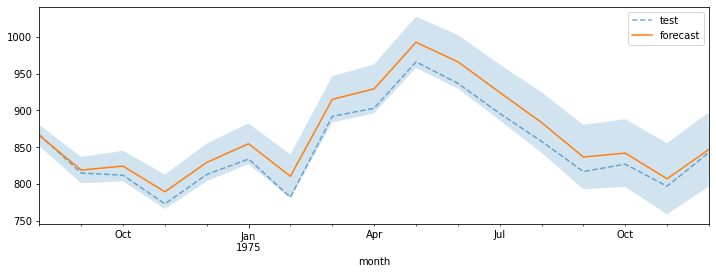

In [14]:

n = test.shape[0]

forecast, conf_interval = auto_model.predict(n_periods=n, return_conf_int=True)

lower_ci, upper_ci  = zip(*conf_interval)

index = test.index

ax = test.plot(style='--', alpha=0.6, figsize=(12,4))

pd.Series(forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

In [15]:
sum(forecast) == sum(conf_interval.mean(axis=1))

True

In [18]:
# Da mesma forma, a função nsdiff ajuda a estimar o número de ordens de diferenciação sazonal (D) necessárias. 
# A implementação abrange dois testes – os testes Osborn-Chui-Smith Birchenhall (ocsb) e Canova-Hansen (ch):

n_adf = ndiffs(milk, test='adf') 
# KPSS test (the default in auto_arima):
n_kpss = ndiffs(milk, test='kpss') 

n_pp = ndiffs(milk, test='pp')  
n_ch = nsdiffs(milk, test='ocsb', m=10, max_D=12,) 
n_ocsb = nsdiffs(milk, test='ch' , m=10, max_D=12,)

In [19]:
# Treinando modelo com vários parâmetros:: você pode fornecer restrições mínimas e máximas para a ordem autorregressiva não sazonal, p, ou a média móvel sazonal, Q. T
model = pm.auto_arima(train, 
                      seasonal=True,
                      with_intercept=True,
                      d=1,
                      max_d=2,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      m=12,
                      D=1,
                      max_D=2,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      test = 'kpss',
                      score='mape',
                      trace=True) 

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1007.319, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=966.470, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=968.422, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=983.036, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=968.438, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=970.470, Time=0.33 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=973.451, Time=0.29 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=968.640, Time=0.39 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=998.468, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=958.000, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=959.947, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=973.934, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=959.963, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=962.000, Time=0.44 sec
 ARIMA(0,1,1)